# Simulating an elementary cellular automaton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
%matplotlib inline
%matplotlib notebook

In [2]:
u = np.array([[4], [2], [1]])

In [3]:
def step(x, rule_b):
    """Compute a single stet of an elementary cellular
    automaton."""
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x, np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

In [4]:
def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

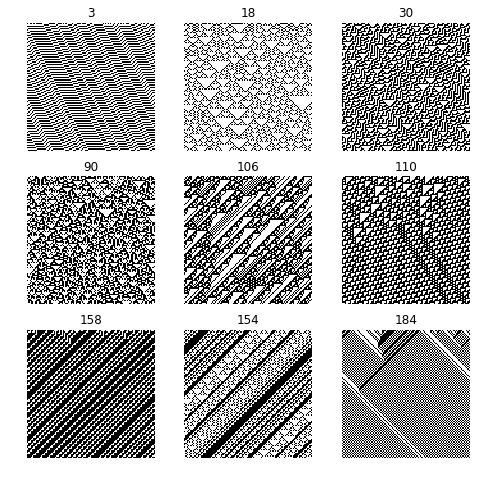

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
rules = [3, 18, 30,
         90, 106, 110,
         158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))

<IPython.core.display.Javascript object>


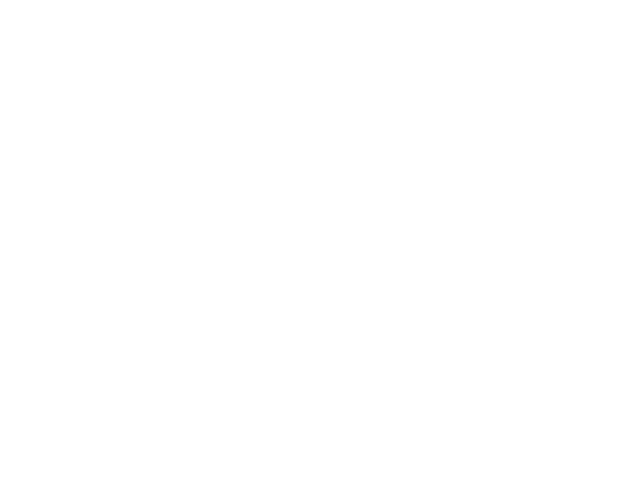

Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [1]:
#gameoflife
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import random
%matplotlib  notebook

width = 100
height = 100
grid = np.zeros((width, height), dtype='i')
new_grid = np.zeros((width, height), dtype='i')


for x in range(0, width):
    for y in range(0,height):
        if(random.randint(0, 100) < 15):
            grid[x][y] = 1
        else:
            grid[x][y] = 0
            
#print(grid)   

def countNeighbours(x,y):
    global grid
    oX = (x+1)%width
    oY = (y+1)%height
    return grid[x-1][y] + grid[x-1][y-1] + grid[x-1][oY] + grid[x][y-1] + grid[x-1][oY] + grid[oX][y] + grid[oX][oY] + grid[oX][y-1]

def update(data):
    global grid, new_grid
    for x in range(width):
        for y in range(height):
            alive = countNeighbours(x,y)
            if(grid[x][y] == 1 and alive < 2):
                new_grid[x][y] = 0
            elif(grid[x][y] == 1 and (alive == 2 or alive == 3)):
                new_grid[x][y] = 1
            elif(grid[x][y] == 1 and alive > 3):
                new_grid[x][y] = 0
            elif(grid[x][y] == 0 and alive == 3):
                new_grid[x][y] = 1      
    mat.set_data(new_grid)
    grid = new_grid.copy()
    return [mat]


# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update, interval=50,save_count=50)
plt.show()    